# <b>CS156 (Introduction to AI), Spring 2021</b>
# <u><b>Homework 7 submission</b></u>

### Roster Name: David Wang
### Student ID: 012368967
### Email address: davidwangdn@gmail.com


##  <u>References and sources </u>

MLP.MNIST.ipynb

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [76]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [77]:
np.random.seed(42)

#### Code the solution

In [82]:
digits = load_digits()
X = digits.data.astype("float32")/255
Y = digits.target.astype("float32")
class_names = digits.target_names

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

In [95]:
modelList = []

In [96]:
model1 = MLPClassifier(random_state=1, max_iter=2500).fit(X_train, Y_train)
modelList.append(model1)

In [97]:
model2 = MLPClassifier(hidden_layer_sizes=(400,150,50), max_iter=2500,activation = 'relu',solver='adam',random_state=1).fit(X_train, Y_train)
modelList.append(model2)

In [98]:
model3 = MLPClassifier(hidden_layer_sizes=(400,150,50), max_iter=2500,activation = 'logistic',solver='adam',random_state=1).fit(X_train, Y_train)
modelList.append(model3)

In [99]:
model4 = MLPClassifier(hidden_layer_sizes=(64,32,8), max_iter=2500,activation = 'relu',solver='adam',random_state=1).fit(X_train, Y_train)
modelList.append(model4)

In [100]:
model5 = MLPClassifier(hidden_layer_sizes=(32,16), max_iter=2500,activation = 'relu',solver='adam',random_state=1).fit(X_train, Y_train)
modelList.append(model5)

In [101]:
model6 = MLPClassifier(hidden_layer_sizes=(120,64,16), max_iter=2500,activation = 'relu',solver='adam',random_state=1).fit(X_train, Y_train)
modelList.append(model6)

In [102]:
model7 = MLPClassifier(hidden_layer_sizes=(320,120,32), max_iter=2500,activation = 'relu',solver='adam',random_state=1).fit(X_train, Y_train)
modelList.append(model7)

In [103]:
crossScoreList = []
testScoreList = []
for model in modelList:
    crossScore = cross_val_score(model, X_train, Y_train, cv=5, verbose=1)
    crossScoreList.append(crossScore)
    testScore = model.score(X_test, Y_test)
    testScoreList.append(testScore)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   54.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   30.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [104]:
for score in crossScoreList:
    print(score)
for score in testScoreList:
    print(score)

[0.96180556 0.98263889 0.95818815 0.96864111 0.96515679]
[0.94444444 0.97569444 0.95121951 0.96167247 0.94425087]
[0.875      0.88541667 0.85714286 0.8989547  0.89547038]
[0.94097222 0.95833333 0.92334495 0.93031359 0.93728223]
[0.9375     0.95486111 0.91289199 0.95121951 0.94425087]
[0.94444444 0.96527778 0.94076655 0.94425087 0.94425087]
[0.94444444 0.97222222 0.94425087 0.95121951 0.95470383]
0.9722222222222222
0.95
0.8611111111111112
0.9388888888888889
0.9277777777777778
0.9416666666666667
0.95


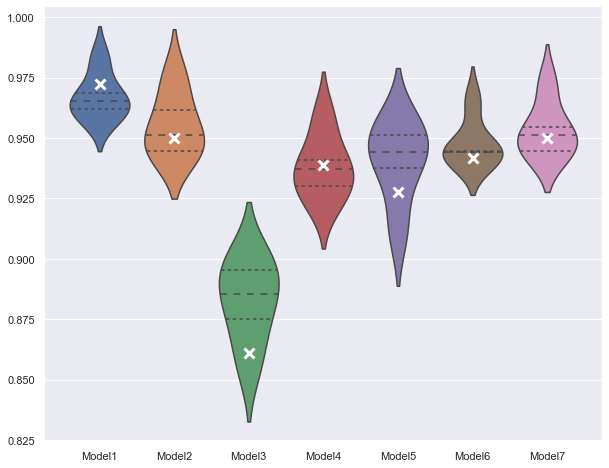

In [105]:
plot = sns.violinplot(gridsize = 300, data = crossScoreList, scale="width", inner="quartile")
labels = plot.set_xticklabels(['Model1','Model2','Model3','Model4','Model5','Model6','Model7'])
plt.plot(testScoreList, marker='x', markersize=10, markeredgewidth=3, color='white',linestyle='None')
plt.show()